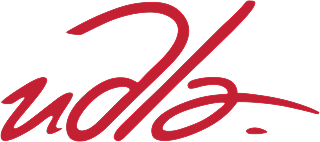

# regresion Polynomial

### Integrantes:
- Juan Aristizabal
- Domenica Escobar
- Jossue Játiva
- Enrique Merizalde

In [49]:
#Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neural_network import MLPRegressor

In [50]:
# Cargar la data
url = 'https://raw.githubusercontent.com/Machine1314/natural_computing/main/data_regression.csv'
data = pd.read_csv(url)

# Usar solo 'xi' como variable predictora
x = data[['xi']]
y = data['yi']

# Normalizar los datos
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

# Mostrar la data normalizada
print(pd.DataFrame(x_scaled, columns=x.columns).head())

         xi
0 -1.367449
1 -0.043135
2 -0.497185
3 -1.594474
4  1.167666


In [51]:
# Crear caracteristicas polinomiales de grado 2
poly = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly.fit_transform(x_scaled)

# Ajustar el modelo de regresion lineal
model = LinearRegression()
model.fit(X_poly, y)

# Predecir los valores
y_pred = model.predict(X_poly)

# Evaluar el modelo
mse = mean_squared_error(y, y_pred)
r2 = r2_score(y, y_pred)
print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')

Mean Squared Error: 3.7058691174351095
R^2 Score: 0.9997859744180885


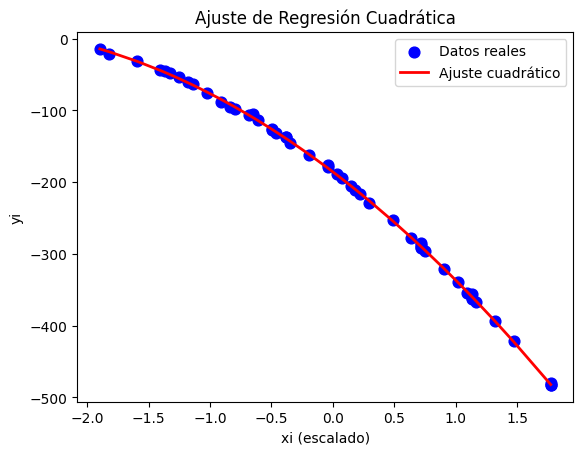

In [52]:
# Visualización del ajuste
plt.scatter(x_scaled[:, 0], y, color='blue', label='Datos reales', s=60)  # bolas azules

# Ordenar para graficar la línea suavemente
idx = np.argsort(x_scaled[:, 0])
plt.plot(x_scaled[idx, 0], y_pred[idx], color='red', label='Ajuste cuadrático', linewidth=2)

plt.xlabel('xi (escalado)')
plt.ylabel('yi')
plt.legend()
plt.title('Ajuste de Regresión Cuadrática')
plt.show()

MSE (GD): 3.71
R^2 (GD): 0.9998
MSE (sklearn): 3.71
R^2 (sklearn): 0.9998


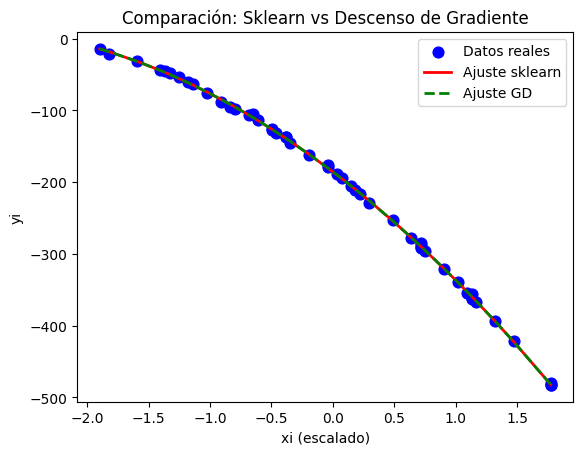

In [53]:
# Model 2: Solución Numérica con Descenso de Gradiente

# Usar los datos ya escalados
X = x_scaled
y = y.values  # Asegúrate de que y sea un array de numpy

# Crear características polinomiales manualmente (grado 2)
X_poly = np.hstack([X, X**2])
X_poly = np.c_[np.ones(X_poly.shape[0]), X_poly]  # Agregar columna de 1s para el sesgo

# Inicializar parámetros
np.random.seed(0)
theta = np.random.randn(X_poly.shape[1])

# Hiperparámetros
lr = 0.01
epochs = 2000

# Función de costo MSE
def compute_cost(X, y, theta):
    y_pred = X @ theta
    return np.mean((y - y_pred) ** 2)

# Descenso de gradiente
costs = []
for epoch in range(epochs):
    y_pred = X_poly @ theta
    error = y_pred - y
    grad = 2 * X_poly.T @ error / len(y)
    theta -= lr * grad
    if epoch % 100 == 0:
        costs.append(compute_cost(X_poly, y, theta))

# Predicciones finales
y_pred_gd = X_poly @ theta

# Evaluación
mse_gd = mean_squared_error(y, y_pred_gd)
r2_gd = r2_score(y, y_pred_gd)
print(f'MSE (GD): {mse_gd:.2f}')
print(f'R^2 (GD): {r2_gd:.4f}')

# Comparar con el modelo de sklearn
print(f'MSE (sklearn): {mean_squared_error(y, y_pred):.2f}')
print(f'R^2 (sklearn): {r2_score(y, y_pred):.4f}')

# Visualización
plt.scatter(X[:, 0], y, color='blue', label='Datos reales', s=60)
idx = np.argsort(X[:, 0])
plt.plot(X[idx, 0], y_pred[idx], color='red', label='Ajuste sklearn', linewidth=2)
plt.plot(X[idx, 0], y_pred_gd[idx], color='green', label='Ajuste GD', linewidth=2, linestyle='--')
plt.xlabel('xi (escalado)')
plt.ylabel('yi')
plt.legend()
plt.title('Comparación: Sklearn vs Descenso de Gradiente')
plt.show()

MLP 10 nodos ocultos - MSE: 39927.18, R2: -1.3059


c:\Users\user\GitRepositories\UDLA\inteligencia_artificial_2\env\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  warnings.warn(


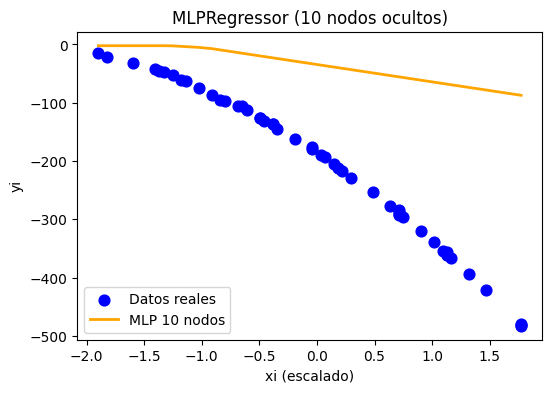

c:\Users\user\GitRepositories\UDLA\inteligencia_artificial_2\env\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  warnings.warn(


MLP 50 nodos ocultos - MSE: 2374.60, R2: 0.8629


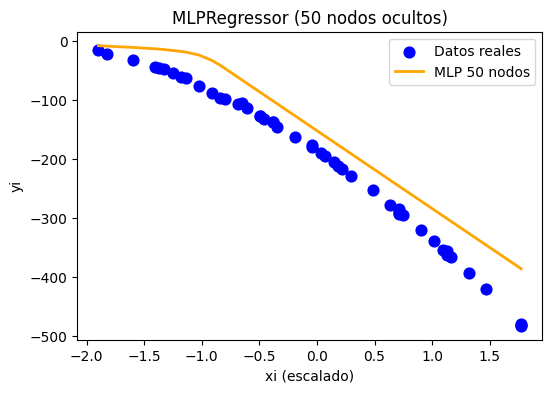

c:\Users\user\GitRepositories\UDLA\inteligencia_artificial_2\env\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  warnings.warn(


MLP 1000 nodos ocultos - MSE: 87.83, R2: 0.9949


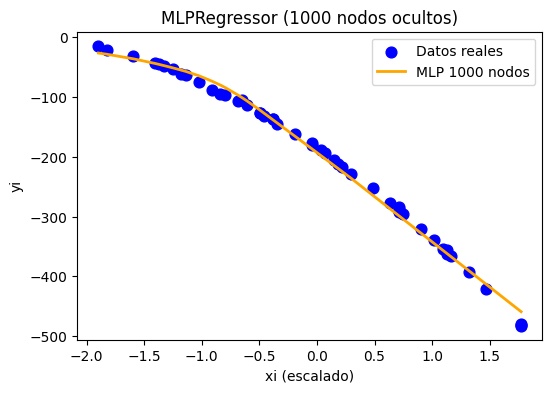

In [54]:
# Modelo 3: MLP para regresión cuadrática

# Entrenamiento y evaluación para tres arquitecturas
hidden_layer_sizes = [10, 50, 1000]
mlp_results = {}

for size in hidden_layer_sizes:
    mlp = MLPRegressor(hidden_layer_sizes=(size,), max_iter=2000, random_state=0)
    mlp.fit(x_scaled, y)
    y_pred_mlp = mlp.predict(x_scaled)
    mse = mean_squared_error(y, y_pred_mlp)
    r2 = r2_score(y, y_pred_mlp)
    mlp_results[size] = (y_pred_mlp, mse, r2)
    print(f"MLP {size} nodos ocultos - MSE: {mse:.2f}, R2: {r2:.4f}")

    # Visualización
    plt.figure(figsize=(6,4))
    plt.scatter(x_scaled[:, 0], y, color='blue', label='Datos reales', s=60)
    idx = np.argsort(x_scaled[:, 0])
    plt.plot(x_scaled[idx, 0], y_pred_mlp[idx], color='orange', label=f'MLP {size} nodos', linewidth=2)
    plt.xlabel('xi (escalado)')
    plt.ylabel('yi')
    plt.legend()
    plt.title(f'MLPRegressor ({size} nodos ocultos)')
    plt.show()

                           Modelo           MSE        R2
0  Regresión Cuadrática (sklearn)      3.705869  0.999786
1           Descenso de Gradiente      3.705869  0.999786
2                  MLP (10 nodos)  39927.183806 -1.305920
3                  MLP (50 nodos)   2374.603655  0.862859
4                MLP (1000 nodos)     87.829487  0.994928


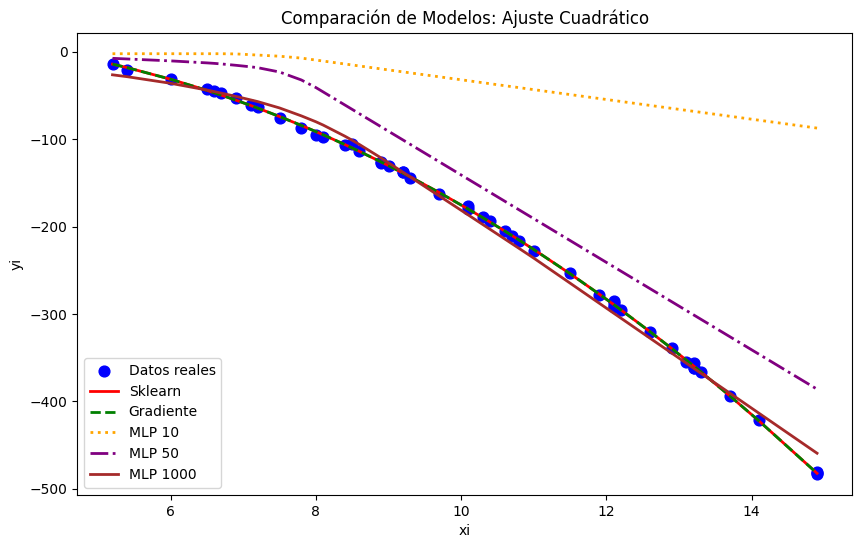


Análisis:
- El modelo de regresión cuadrática (sklearn) y el descenso de gradiente ajustan muy bien la tendencia cuadrática, con valores altos de R² y bajo MSE.
- El MLP con 10 nodos se comporta casi lineal, con menor ajuste.
- El MLP con 50 nodos logra un ajuste cuadrático similar a los modelos clásicos.
- El MLP con 1000 nodos tiende a sobreajustar, siguiendo demasiado los puntos y perdiendo generalización.
- El mejor modelo para la tendencia cuadrática es el de regresión cuadrática (sklearn) o el MLP con 50 nodos, ya que logran el equilibrio entre ajuste y generalización.



In [ ]:
# --- Comparación y análisis de los tres modelos ---

# Invertir el escalado para interpretar en el dominio original
x_inv = scaler.inverse_transform(x_scaled)

# Predicciones de cada modelo en el dominio original
# Modelo 1 (sklearn)
y_pred_inv = y_pred  # y ya está en escala original

# Modelo 2 (GD)
y_pred_gd_inv = y_pred_gd  # ya está en escala original

# Modelo 3 (MLP)
mlp_preds_inv = {size: preds for size, (preds, _, _) in mlp_results.items()}

# Tabla de comparación
import pandas as pd
results = {
    "Modelo": ["Regresión Cuadrática (sklearn)", "Descenso de Gradiente", "MLP (10 nodos)", "MLP (50 nodos)", "MLP (1000 nodos)"],
    "MSE": [
        mean_squared_error(y, y_pred),
        mean_squared_error(y, y_pred_gd),
        mlp_results[10][1],
        mlp_results[50][1],
        mlp_results[1000][1]
    ],
    "R2": [
        r2_score(y, y_pred),
        r2_score(y, y_pred_gd),
        mlp_results[10][2],
        mlp_results[50][2],
        mlp_results[1000][2]
    ]
}
df_results = pd.DataFrame(results)
print(df_results)

# Gráfica comparativa
plt.figure(figsize=(10,6))
plt.scatter(x_inv[:, 0], y, color='blue', label='Datos reales', s=60)
idx = np.argsort(x_inv[:, 0])
plt.plot(x_inv[idx, 0], y_pred[idx], color='red', label='Sklearn', linewidth=2)
plt.plot(x_inv[idx, 0], y_pred_gd[idx], color='green', label='Gradiente', linewidth=2, linestyle='--')
plt.plot(x_inv[idx, 0], mlp_preds_inv[10][idx], color='orange', label='MLP 10', linewidth=2, linestyle=':')
plt.plot(x_inv[idx, 0], mlp_preds_inv[50][idx], color='purple', label='MLP 50', linewidth=2, linestyle='-.')
plt.plot(x_inv[idx, 0], mlp_preds_inv[1000][idx], color='brown', label='MLP 1000', linewidth=2, linestyle='-')
plt.xlabel('xi')
plt.ylabel('yi')
plt.legend()
plt.title('Comparación de Modelos: Ajuste Cuadrático')
plt.show()